# Tools and Examples Using MyTools.ipynb \- Part 1 \- Assigning monomials to graph vertices and edges

The notebook  in `MyTools.ipynb` (see Appendix) contains function definitions that will prove useful as we further explore receptor modeling.  The command `% run MyTools.ipynb` loads these function definitions and the remainder of this notebook illustrates how to use some of them.  The focus is on tools that assigning monomials to receptor model states and transitions (i.e., graph vertices and edges).  Doing this makes the structure of a receptor model easier to undertand.  It also facilitates symbolic calcuations that begin with the state-transition diagram of a receptor model.  


In [79]:
%%capture
%run MyTools.ipynb

To begin we specify the states and transitions of a receptor model as an undirected graph. For simplicity, we will use a four\-state model with one cycle.



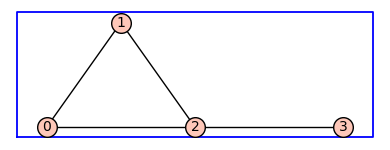

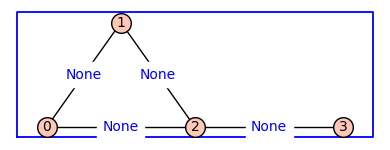

In [80]:
pos = {0: (0, 0), 1: (1, 1.41), 2: (2, 0), 3: (4,0)} # vertex positions
G = Graph({0: [1, 2], 1: [2], 2: [3]},pos=pos)

G.show(figsize=4,graph_border=True)
G.show(figsize=4,graph_border=True,edge_labels=True)

By default the vertices are `integers` and the edge labels are `None`.   The method `show()` has a named parameter `edge_lablels` that is set to `False` by default (above left). To see the edge labels we repeat the `show()` command using `edge_labels=True`.

## print_graph

The first function we will illustrate is `print_graph`. On the next line, the command `mydoc(print_graph)` provides information about the usage.   As advertized, he command `print_graph(G)` gives a list of the vertices and edges of `G`.

In [81]:
mydoc(print_graph)

**`print_graph(G)`**

Prints the vertices and edges of the graph `G`.
    

In [82]:
print_graph(G)

vertices: [0, 1, 2, 3]
edges: [(0, 1, None), (0, 2, None), (1, 2, None), (2, 3, None)]


## add_vertex_monomials 

The next function we will illustrate is `add_vertex_monomials`.  One the next line, the command `mydoc(add_vertex_monomials` provides information about the usage.  The command `help(add_vertex_monomials)` gives the same result without the markdown being processed \(not shown\).

In [83]:
mydoc(add_vertex_monomials)

**`add_vertex_monomials(G=Graph on 0 vertices, method='integer', ring=False)`**

Add monomials to vertices of a graph. 

The add_vertex_monomials function takes a graph G, as well as optional parameters method and ring. The function creates a new graph H with vertices labeled by monomials. The monomials are chosen based on the number of vertices in G. If the method parameter is set to 'alpha' and the number of vertices in G is less than or equal to 10, the monomials are chosen as alphabetical letters ('a' to 'k'). Otherwise, the monomials are chosen as strings of the form 'a0', 'a1', ..., 'an-1', where n is the number of vertices in G. The function then adds the vertices from G to H using the monomials as labels, and adds the edges from G to H using the monomials as endpoints. If the ring parameter is set to True, the function also creates a polynomial ring V with the chosen monomials and 'invlex' order, and returns both H and V. Otherwise, it returns only H.

INPUT:

- ``G`` -- graph object (default: `Graph()`);

- ``method`` -- integer (default: ``integer``);

OUTPUT: 

- The graph with monomials as vertices

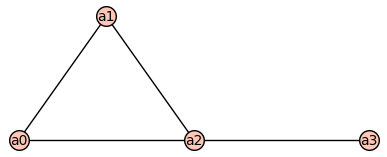

In [84]:
H=add_vertex_monomials(G)
H.show(figsize=4)

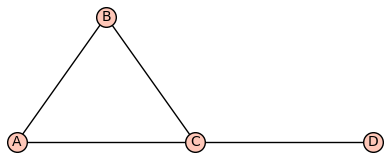

In [85]:
H2=add_vertex_monomials(G,method='alpha')
H2.show(figsize=4)

## add_edge_monomials()

In [86]:
mydoc(add_edge_monomials)

**`add_edge_monomials(G, method='integer', edge_vars=['b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], ring=False, short_name=False)`**

<IPython.core.display.Markdown object>

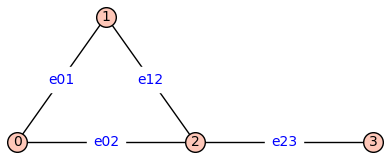

In [87]:
H3=add_edge_monomials(G)
H3.show(figsize=4,edge_labels=True)

The function `add_edge_monomials()`also works when vertices are variables from a polynomial ring.



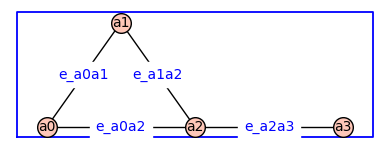

In [88]:
H4=add_edge_monomials(H)
H4.show(figsize=4,graph_border=True,edge_labels=True)

Using `method='alpha'` in `add_edge_monomials()` creates simpler edge labels

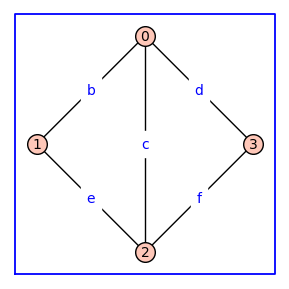

In [89]:
G = graphs.CycleGraph(4); G.add_edge(0,2)
G = add_edge_monomials(G,method='alpha')
G.show(figsize=4,graph_border=True,edge_labels=True)

Using `ring=True` in `add_vertex_monomials()` constructs a polynomial ring over the variables that label the vertices

In [90]:
(G,V) = add_vertex_monomials(graphs.HouseGraph(),ring=True)
show(V)

Multivariate Polynomial Ring in a0, a1, a2, a3, a4 over Integer Ring

In [91]:
from IPython.display import display, Math
display(Math('\\eta \\beta \\alpha \\kappa'))

<IPython.core.display.Math object>

In [92]:
from IPython.display import display, Math
display(Math(latex(V)))

<IPython.core.display.Math object>

In [93]:
V.inject_variables()
fv = (a0+a1)*(a0+a3+a4)^2
print(fv)

Defining a0, a1, a2, a3, a4
a1*a4^2 + a0*a4^2 + 2*a1*a3*a4 + 2*a0*a3*a4 + 2*a0*a1*a4 + 2*a0^2*a4 + a1*a3^2 + a0*a3^2 + 2*a0*a1*a3 + 2*a0^2*a3 + a0^2*a1 + a0^3


## Using `ring=True` in `add_edge_monomials()` constructs a polynomial ring over the variables that label the edges



In [94]:
(G,E) = add_edge_monomials(graphs.HouseGraph(),method='alpha',ring=True)
show(E)

Multivariate Polynomial Ring in b, c, d, e, f, g over Integer Ring

In [95]:
E.inject_variables()
fe = (b+c)*(b+e+f)^2
print(fe)

Defining b, c, d, e, f, g
c*f^2 + b*f^2 + 2*c*e*f + 2*b*e*f + 2*b*c*f + 2*b^2*f + c*e^2 + b*e^2 + 2*b*c*e + 2*b^2*e + b^2*c + b^3


## Below we create a spanning tree labelled according to a breadth\-first traversal



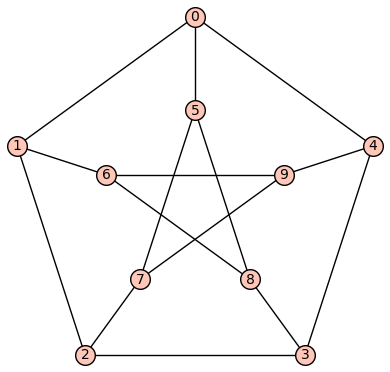

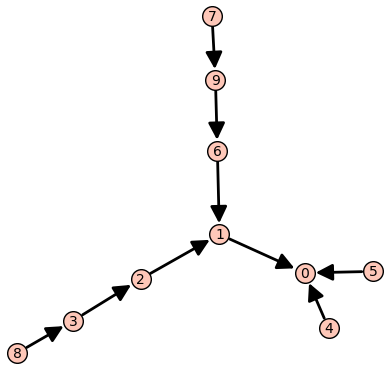

[0, 1, 4, 5, 2, 6, 3, 9, 7, 8]

In [96]:
P = graphs.PetersenGraph()
P.show(edge_labels=False)
(BFSVertexList,BFSTree) = P.lex_BFS(tree=True,initial_vertex=0)
BFSTree.show(edge_labels=False)
show(BFSVertexList)


In [97]:
d = dict((v,i) for i, v in enumerate(BFSVertexList))
print(d)

{0: 0, 1: 1, 4: 2, 5: 3, 2: 4, 6: 5, 3: 6, 9: 7, 7: 8, 8: 9}


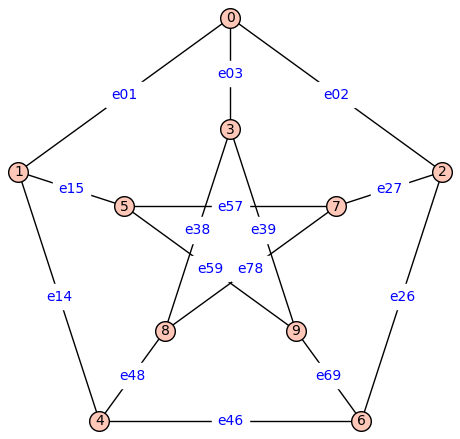

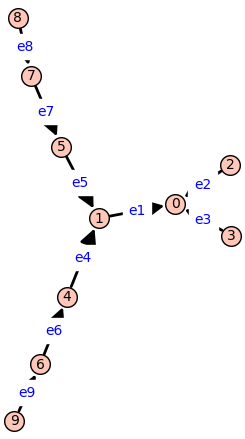

In [98]:
P2 = P.copy()
P2.relabel(d)
P2 = add_edge_monomials(P2)
P2.show(figsize=6,edge_labels=True)

T2=BFSTree.copy()
T2.relabel(d)
T2 = add_edge_monomials(T2,short_name=True)
T2.show(figsize=6,edge_labels=True)